In [1]:
import os
os.chdir('C:\\Users\\Admin\\Desktop\\backup_files\\LMS_ML_PROJCTS')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

df= pd.read_csv('h1n1_vaccine_prediction.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

Drop

In [3]:
#lets drop first unique_ID
df33 =df.drop(['unique_id'],axis=1)
df33.info() #now 33 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

In [4]:
#Dropping null will give you only 50% values
dfnomissing = df33.dropna()
dfnomissing.info() #11,794 rows; 33 columns

#So we will remove the column-"has_ health_insurance" (14433 rows only)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11794 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 11794 non-null  float64
 1   h1n1_awareness             11794 non-null  float64
 2   antiviral_medication       11794 non-null  float64
 3   contact_avoidance          11794 non-null  float64
 4   bought_face_mask           11794 non-null  float64
 5   wash_hands_frequently      11794 non-null  float64
 6   avoid_large_gatherings     11794 non-null  float64
 7   reduced_outside_home_cont  11794 non-null  float64
 8   avoid_touch_face           11794 non-null  float64
 9   dr_recc_h1n1_vacc          11794 non-null  float64
 10  dr_recc_seasonal_vacc      11794 non-null  float64
 11  chronic_medic_condition    11794 non-null  float64
 12  cont_child_undr_6_mnths    11794 non-null  float64
 13  is_health_worker           11794 non-null  flo

In [5]:
#Create a new file name 'df32' This is shown  below
df32 =df33.drop(['has_health_insur'],axis=1)
df32.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

In [6]:
df32.isnull().sum()

h1n1_worry                     92
h1n1_awareness                116
antiviral_medication           71
contact_avoidance             208
bought_face_mask               19
wash_hands_frequently          42
avoid_large_gatherings         87
reduced_outside_home_cont      82
avoid_touch_face              128
dr_recc_h1n1_vacc            2160
dr_recc_seasonal_vacc        2160
chronic_medic_condition       971
cont_child_undr_6_mnths       820
is_health_worker              804
is_h1n1_vacc_effective        391
is_h1n1_risky                 388
sick_from_h1n1_vacc           395
is_seas_vacc_effective        462
is_seas_risky                 514
sick_from_seas_vacc           537
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment                   1463
census_msa                      0
no_of_adults  

In [7]:
df_vac = df32.dropna()
df_vac.info()
#19642 is a good no to go with!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 19642 non-null  float64
 1   h1n1_awareness             19642 non-null  float64
 2   antiviral_medication       19642 non-null  float64
 3   contact_avoidance          19642 non-null  float64
 4   bought_face_mask           19642 non-null  float64
 5   wash_hands_frequently      19642 non-null  float64
 6   avoid_large_gatherings     19642 non-null  float64
 7   reduced_outside_home_cont  19642 non-null  float64
 8   avoid_touch_face           19642 non-null  float64
 9   dr_recc_h1n1_vacc          19642 non-null  float64
 10  dr_recc_seasonal_vacc      19642 non-null  float64
 11  chronic_medic_condition    19642 non-null  float64
 12  cont_child_undr_6_mnths    19642 non-null  float64
 13  is_health_worker           19642 non-null  flo

In [8]:
df_vac.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: i

In [9]:
##_________________1. Always start with the target variable
# 1. h1n1_vaccine -Target Variable
df_vac.h1n1_vaccine.isnull().sum() #No Missing Values
df_vac.h1n1_vaccine.value_counts()

0    15128
1     4514
Name: h1n1_vaccine, dtype: int64

Text(0.5, 1.0, 'Bar Plot of h1n1_vaccine')

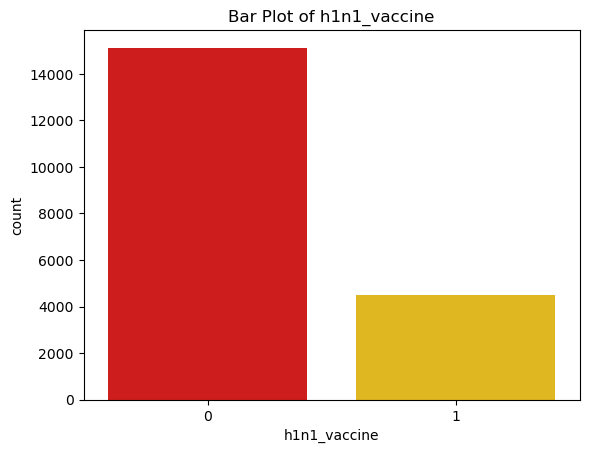

In [10]:
#Bar_plot
sns.countplot(x = 'h1n1_vaccine', data =df_vac , palette ='hot')
plt.title ('Bar Plot of h1n1_vaccine')

Text(0.5, 1.0, 'Histogram of h1n1_worry')

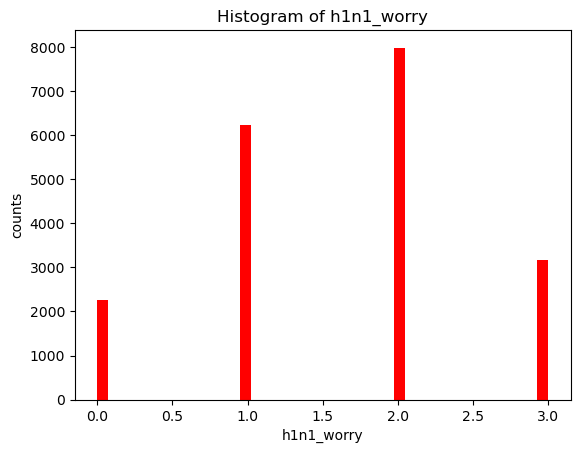

In [11]:
#_____________ 2 h1n1_worry [0,1,2,3] ordered
#__________histogram
#_run in black
plt.hist(df_vac.h1n1_worry, bins ='auto', facecolor='red')
plt.xlabel('h1n1_worry')
plt.ylabel('counts')
plt.title('Histogram of h1n1_worry')

<AxesSubplot:>

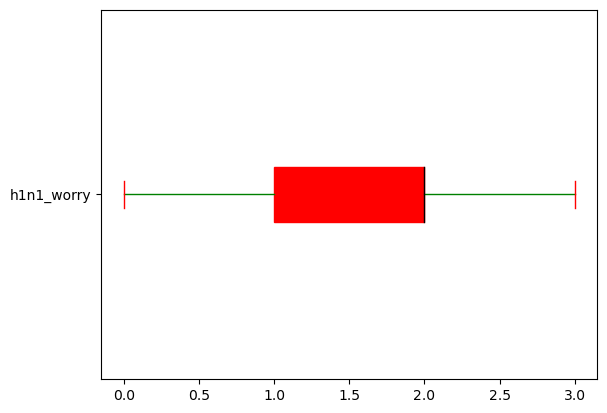

In [12]:
#________boxplot
props2 = dict(boxes ='red', whiskers ='green', medians ='black', caps='red')
df_vac['h1n1_worry'].plot.box(color=props2, patch_artist =True,  vert =False)

In [13]:
df_vac.h1n1_worry.isnull().sum() #0 Missing_values

0

In [14]:
df_vac.h1n1_worry.value_counts()

2.0    7989
1.0    6229
3.0    3175
0.0    2249
Name: h1n1_worry, dtype: int64

Is h1n1_worry a good  predictor?

In [15]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod= ols('h1n1_worry ~ h1n1_vaccine',data =df_vac).fit()
aov_table =sm.stats.anova_lm(mod)
print(aov_table)
#1.564e-79 iq: p_value is<0.05: Ho Reject: Good Predictor

                   df        sum_sq     mean_sq           F        PR(>F)
h1n1_vaccine      1.0    278.817902  278.817902  359.846071  1.564062e-79
Residual      19640.0  15217.572282    0.774825         NaN           NaN


In [16]:
# let's judge from chisquare way!
from scipy.stats import chi2_contingency
ct_worry = pd.crosstab(df_vac.h1n1_vaccine, df_vac.h1n1_worry)
chi2_contingency(ct_worry, correction = False)
# p_val = 4.9e-78, Ho reject, hence association exists, good predictor 

(361.4688796942114,
 4.900068231096281e-78,
 3,
 array([[1732.14906832, 4797.49068323, 6153.01863354, 2445.34161491],
        [ 516.85093168, 1431.50931677, 1835.98136646,  729.65838509]]))

Text(0.5, 1.0, 'Histogram of h1n1_awareness')

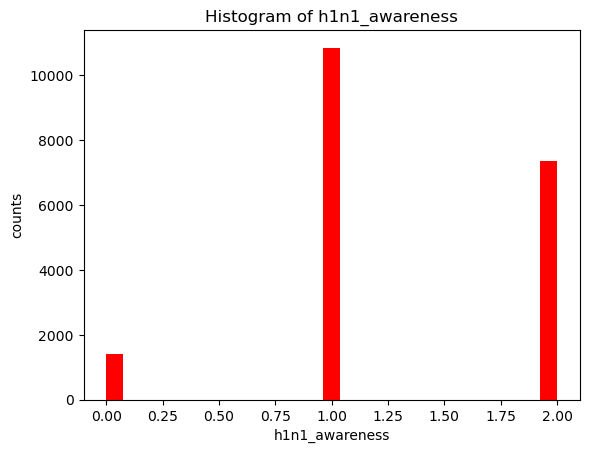

In [17]:
#_____________________________# 3 h1n1_awareness [0,1,2] ordered
#______histogram
#_run in block
plt.hist(df_vac.h1n1_awareness, bins = 'auto', facecolor = 'red')
plt.xlabel('h1n1_awareness')
plt.ylabel('counts')
plt.title('Histogram of h1n1_awareness') 

<AxesSubplot:>

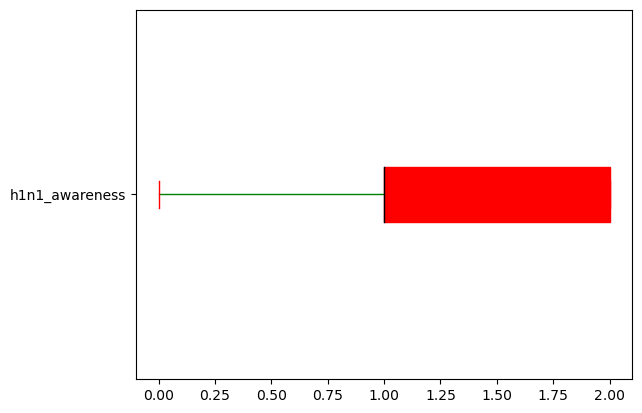

In [18]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df_vac['h1n1_awareness'].plot.box(color=props2, patch_artist = True, vert = False) #No outliers

In [19]:
df_vac.h1n1_awareness.isnull().sum() #0 Missing values
df_vac.h1n1_awareness.value_counts() 

1.0    10861
2.0     7362
0.0     1419
Name: h1n1_awareness, dtype: int64

Text(0.5, 1.0, 'Countplot of h1n1_awareness')

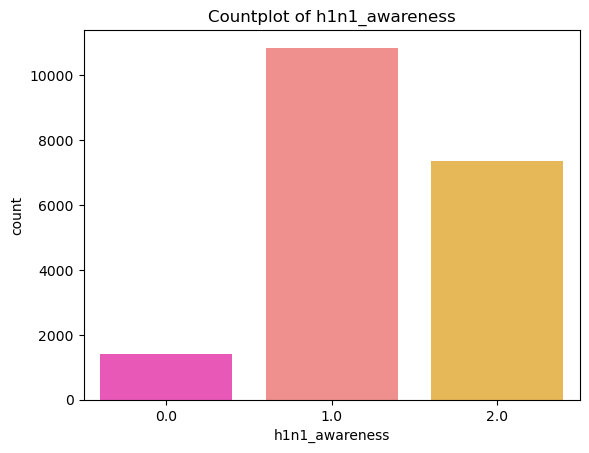

In [20]:
sns.countplot(x = 'h1n1_awareness', data = df_vac , palette = 'spring')
plt.title('Countplot of h1n1_awareness')

In [21]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('h1n1_awareness ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
#3.442e-70 ie  p_value is <0.05; Ho Reject; Good Predictor

                   df       sum_sq     mean_sq           F        PR(>F)
h1n1_vaccine      1.0   110.644675  110.644675  316.210167  3.441770e-70
Residual      19640.0  6872.206002    0.349909         NaN           NaN


In [22]:
#_______________ 4 antiviral_medication [0 and 1]

df_vac.antiviral_medication.isnull().sum() #0 Missing values
df_vac.antiviral_medication.value_counts() 

0.0    18671
1.0      971
Name: antiviral_medication, dtype: int64

Text(0.5, 1.0, 'Countplot of antiviral_medication')

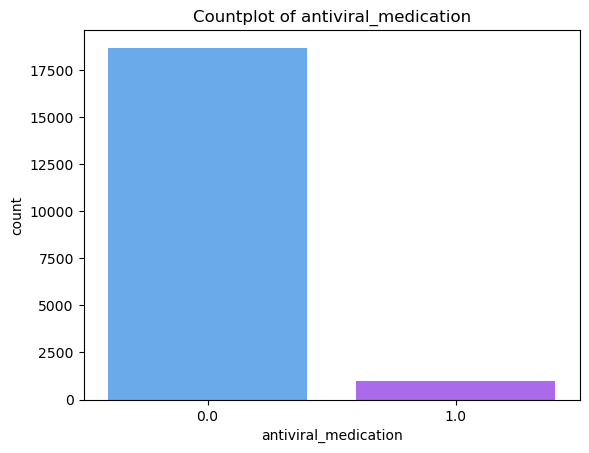

In [23]:
# Bar Plot
sns.countplot(x = 'antiviral_medication', data = df_vac , palette = 'cool')
plt.title('Countplot of antiviral_medication')

In [24]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_antiviral = pd.crosstab(df_vac.h1n1_vaccine, df_vac.antiviral_medication)
chi2_contingency(ct_antiviral, correction = False)
# p_val = 3.9e-7, Ho reject, hence association exists, good predictor 


(25.7430310280289,
 3.900328532557542e-07,
 1,
 array([[14380.14906832,   747.85093168],
        [ 4290.85093168,   223.14906832]]))

In [25]:
#________________ 5 contact_avoidance [0 and 1]

df_vac.contact_avoidance.isnull().sum() #0 Missing values
df_vac.contact_avoidance.value_counts() 

1.0    14544
0.0     5098
Name: contact_avoidance, dtype: int64

Text(0.5, 1.0, 'Countplot of contact_avoidance')

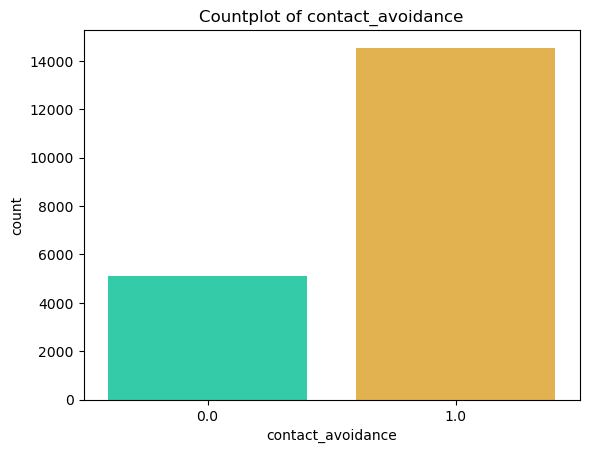

In [26]:
# Bar Plot
sns.countplot(x = 'contact_avoidance', data = df_vac , palette = 'turbo')
plt.title('Countplot of contact_avoidance')


In [27]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_avoid = pd.crosstab(df_vac.h1n1_vaccine, df_vac.contact_avoidance)
chi2_contingency(ct_avoid, correction = False)
# p_val = 6.6 e-10, Ho reject, hence association exists, good predictor 


(38.119047488867295,
 6.655721920427935e-10,
 1,
 array([[ 3926.40993789, 11201.59006211],
        [ 1171.59006211,  3342.40993789]]))

In [28]:
#_________________ 6 bought_face_mask [0 and 1]

df_vac.bought_face_mask.isnull().sum() #0 Missing values
df_vac.bought_face_mask.value_counts() 

0.0    18312
1.0     1330
Name: bought_face_mask, dtype: int64

Text(0.5, 1.0, 'Countplot of bought_face_mask')

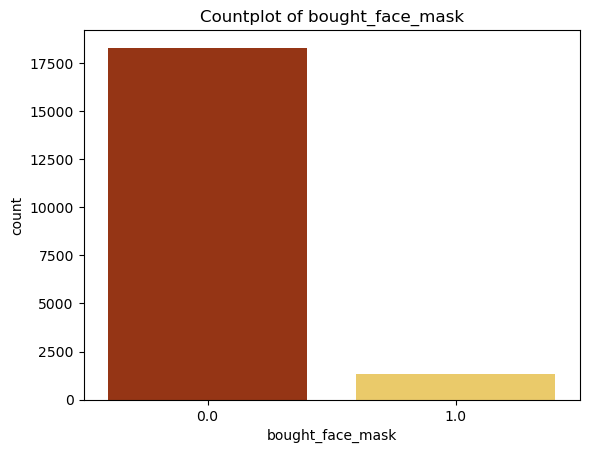

In [29]:
# Bar Plot
sns.countplot(x = 'bought_face_mask', data = df_vac , palette = 'afmhot')
plt.title('Countplot of bought_face_mask')

In [30]:
#Hypothesis Testing
ct_mask = pd.crosstab(df_vac.h1n1_vaccine, df_vac.bought_face_mask)
chi2_contingency(ct_mask, correction = False)
# p_val = 4.9 e-26, Ho reject, hence association exists, good predictor

(111.38079745607507,
 4.8829999983371125e-26,
 1,
 array([[14103.65217391,  1024.34782609],
        [ 4208.34782609,   305.65217391]]))

In [31]:
#________________ 7 wash_hands_frequently [0 and 1] 

df_vac.wash_hands_frequently.isnull().sum() #0 Missing values
df_vac.wash_hands_frequently.value_counts() 

1.0    16399
0.0     3243
Name: wash_hands_frequently, dtype: int64

Text(0.5, 1.0, 'Countplot of wash_hands_frequently')

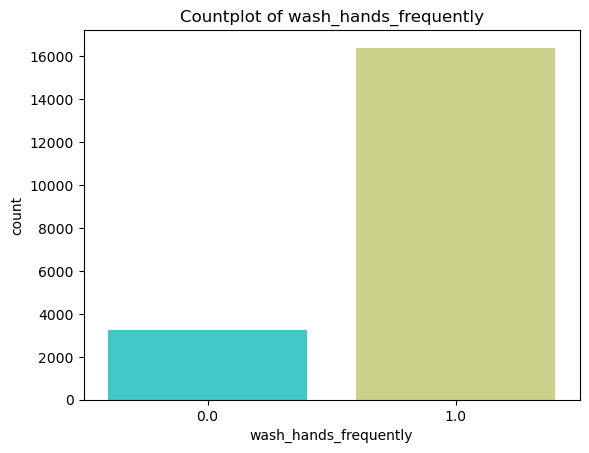

In [32]:
# Bar Plot
sns.countplot(x = 'wash_hands_frequently', data = df_vac , palette = 'rainbow')
plt.title('Countplot of wash_hands_frequently')

In [33]:
#Hypothesis Testing
ct_wash = pd.crosstab(df_vac.h1n1_vaccine, df_vac.wash_hands_frequently)
chi2_contingency(ct_wash, correction = False)
# p_val = 4.3 e-26, Ho reject, hence association exists, good predictor 


(111.62137100015417,
 4.32500265148964e-26,
 1,
 array([[ 2497.71428571, 12630.28571429],
        [  745.28571429,  3768.71428571]]))

In [34]:
#__________________ 8 avoid_large_gatherings [0 and 1]

df_vac.avoid_large_gatherings.isnull().sum() #0 Missing values
df_vac.avoid_large_gatherings.value_counts() 

0.0    12703
1.0     6939
Name: avoid_large_gatherings, dtype: int64

Text(0.5, 1.0, 'Countplot of avoid_large_gatherings')

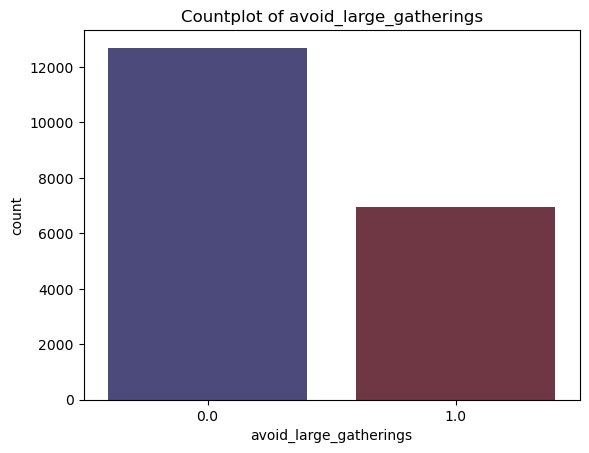

In [35]:
# Bar Plot
sns.countplot(x = 'avoid_large_gatherings', data = df_vac , palette = 'icefire')
plt.title('Countplot of avoid_large_gatherings')

In [36]:
#Hypothesis Testing
ct_gath = pd.crosstab(df_vac.h1n1_vaccine, df_vac.avoid_large_gatherings)
chi2_contingency(ct_gath, correction = False)
# p_val = 0.004, Ho reject, hence association exists, good predictor 


(8.326019959345679,
 0.003908118862931521,
 1,
 array([[9783.67701863, 5344.32298137],
        [2919.32298137, 1594.67701863]]))

In [37]:
#______________ 9 reduced_outside_home_cont [0 and 1] 
df_vac.reduced_outside_home_cont.isnull().sum() #0 Missing values
df_vac.reduced_outside_home_cont.value_counts() 


0.0    13159
1.0     6483
Name: reduced_outside_home_cont, dtype: int64

Text(0.5, 1.0, 'Countplot of reduced_outside_home_cont')

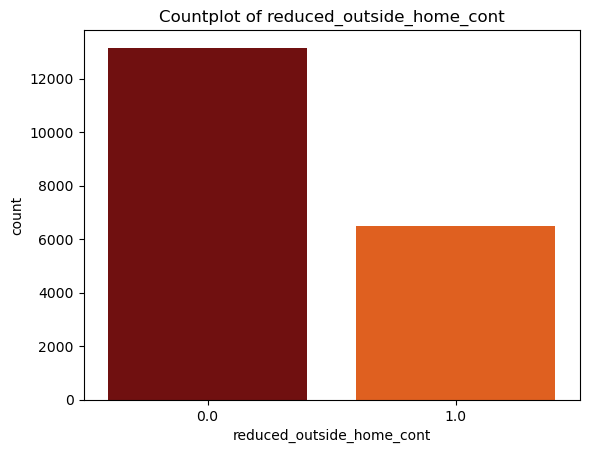

In [38]:
# Bar Plot
sns.countplot(x = 'reduced_outside_home_cont', data = df_vac , palette = 'gist_heat')
plt.title('Countplot of reduced_outside_home_cont')

In [39]:
#Hypothesis Testing
ct_outside = pd.crosstab(df_vac.h1n1_vaccine, df_vac.reduced_outside_home_cont)
chi2_contingency(ct_outside, correction = False)
# p_val = 0.015, Ho reject, hence association exists, good predictor

(5.859941970831115,
 0.015489304669565737,
 1,
 array([[10134.88198758,  4993.11801242],
        [ 3024.11801242,  1489.88198758]]))

In [40]:
#__________________10 avoid_touch_face [0 and 1]
df_vac.avoid_touch_face.isnull().sum() #0 Missing values
df_vac.avoid_touch_face.value_counts() 

1.0    13455
0.0     6187
Name: avoid_touch_face, dtype: int64

Text(0.5, 1.0, 'Countplot of avoid_touch_face')

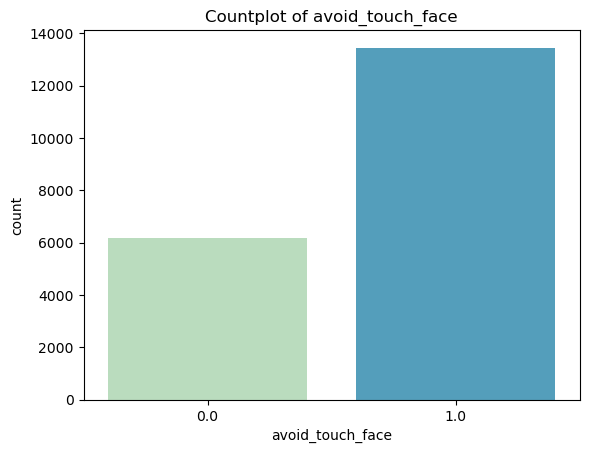

In [41]:
# Bar Plot
sns.countplot(x = 'avoid_touch_face', data = df_vac , palette = 'GnBu')
plt.title('Countplot of avoid_touch_face')

In [42]:
#Hypothesis Testing
ct_face = pd.crosstab(df_vac.h1n1_vaccine, df_vac.avoid_touch_face)
chi2_contingency(ct_face, correction = False)
# p_val = 1.5e-23, Ho reject, hence association exists, good predictor 


(99.97660321127165,
 1.5420802703508326e-23,
 1,
 array([[ 4765.14285714, 10362.85714286],
        [ 1421.85714286,  3092.14285714]]))

In [43]:
#_____________________ 11 dr_recc_h1n1_vacc [0 and 1]
df_vac.dr_recc_h1n1_vacc.isnull().sum() #0 Missing values
df_vac.dr_recc_h1n1_vacc.value_counts() 

0.0    15203
1.0     4439
Name: dr_recc_h1n1_vacc, dtype: int64

Text(0.5, 1.0, 'Histogram of dr_recc_h1n1_vacc')

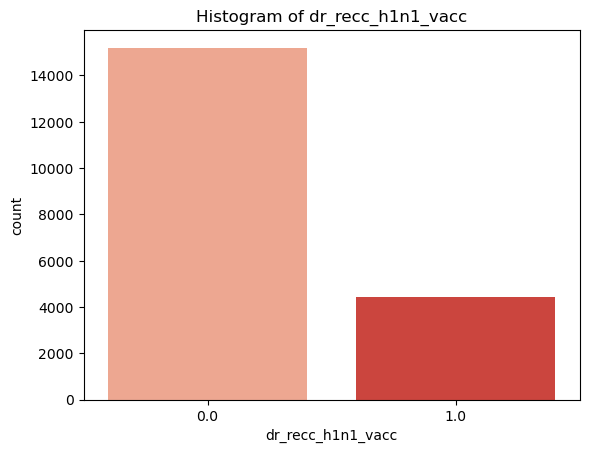

In [44]:
# Bar Plot
sns.countplot(x = 'dr_recc_h1n1_vacc', data = df_vac , palette = 'Reds')
plt.title('Histogram of dr_recc_h1n1_vacc')

In [45]:
#Hypothesis Testing
ct_drrec = pd.crosstab(df_vac.h1n1_vaccine, df_vac.dr_recc_h1n1_vacc)
chi2_contingency(ct_drrec, correction = False)
# p_val = 0, Ho reject, hence association exists, good predictor 

(3094.6916755786597,
 0.0,
 1,
 array([[11709.14285714,  3418.85714286],
        [ 3493.85714286,  1020.14285714]]))

In [46]:
#_______________ 12 dr_recc_seasonal_vacc [0 and 1]
df_vac.dr_recc_seasonal_vacc.isnull().sum() #0 Missing values
df_vac.dr_recc_seasonal_vacc.value_counts()

0.0    13091
1.0     6551
Name: dr_recc_seasonal_vacc, dtype: int64

Text(0.5, 1.0, 'Barplot of dr_recc_seasonal_vacc')

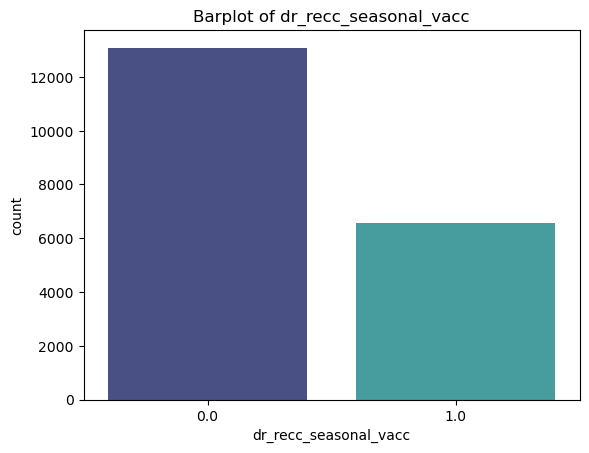

In [47]:
# Bar Plot
sns.countplot(x = 'dr_recc_seasonal_vacc', data = df_vac , palette = 'mako')
plt.title('Barplot of dr_recc_seasonal_vacc')

In [48]:
#Hypothesis Testing
ct_drseason = pd.crosstab(df_vac.h1n1_vaccine, df_vac.dr_recc_seasonal_vacc)
chi2_contingency(ct_drseason, correction = False)
# p_val = 2.2e-192, Ho reject, hence association exists, good predictor 

(875.3779473401858,
 2.21025047497519e-192,
 1,
 array([[10082.50931677,  5045.49068323],
        [ 3008.49068323,  1505.50931677]]))

In [49]:
#________________________ 13 chronic_medic_condition [0 and 1]
df_vac.chronic_medic_condition.isnull().sum() #0 Missing values
df_vac.chronic_medic_condition.value_counts()

0.0    14066
1.0     5576
Name: chronic_medic_condition, dtype: int64

Text(0.5, 1.0, 'Barplot of chronic_medic_condition')

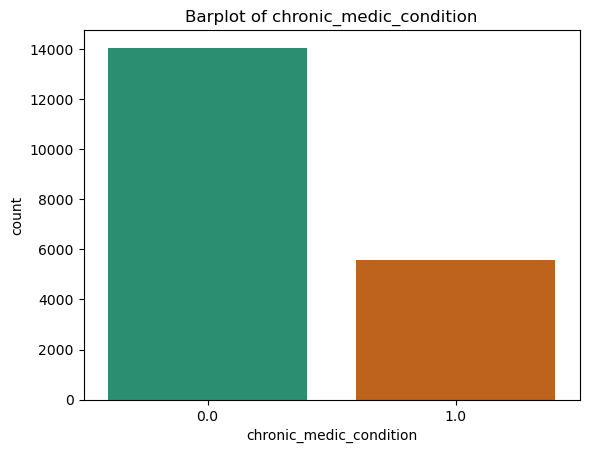

In [50]:
# Bar Plot
sns.countplot(x = 'chronic_medic_condition', data = df_vac , palette = 'Dark2')
plt.title('Barplot of chronic_medic_condition')

In [51]:
#Hypothesis Testing
ct_chronic = pd.crosstab(df_vac.h1n1_vaccine, df_vac.chronic_medic_condition)
chi2_contingency(ct_chronic, correction = False)
# p_val = 1.39e-49, Ho reject, hence association exists, good predicto

(219.14944840010486,
 1.3864754403096512e-49,
 1,
 array([[10833.44099379,  4294.55900621],
        [ 3232.55900621,  1281.44099379]]))

In [52]:
#_________________ 14 cont_child_undr_6_mnths [0 and 1]
df_vac.cont_child_undr_6_mnths.isnull().sum() #0 Missing values
df_vac.cont_child_undr_6_mnths.value_counts() 

0.0    17995
1.0     1647
Name: cont_child_undr_6_mnths, dtype: int64

Text(0.5, 1.0, 'Barplot of cont_child_undr_6_mnths')

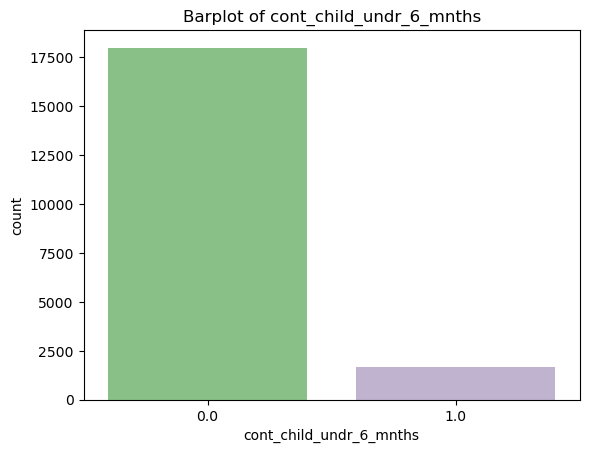

In [53]:
# Bar Plot
sns.countplot(x = 'cont_child_undr_6_mnths', data = df_vac , palette = 'Accent')
plt.title('Barplot of cont_child_undr_6_mnths')

In [54]:
#Hypothesis Testing
ct_child = pd.crosstab(df_vac.h1n1_vaccine, df_vac.cont_child_undr_6_mnths)
chi2_contingency(ct_child, correction = False)
# p_val = 9.2e-26, Ho reject, hence association exists, good predictor 


(110.12378230842235,
 9.205896231946304e-26,
 1,
 array([[13859.50310559,  1268.49689441],
        [ 4135.49689441,   378.50310559]]))

In [55]:
#____________________ 15 is_health_worker [0 and 1]
df_vac.is_health_worker.isnull().sum() #0 Missing values
df_vac.is_health_worker.value_counts() 

0.0    17310
1.0     2332
Name: is_health_worker, dtype: int64

Text(0.5, 1.0, 'Countplot of is_health_worker')

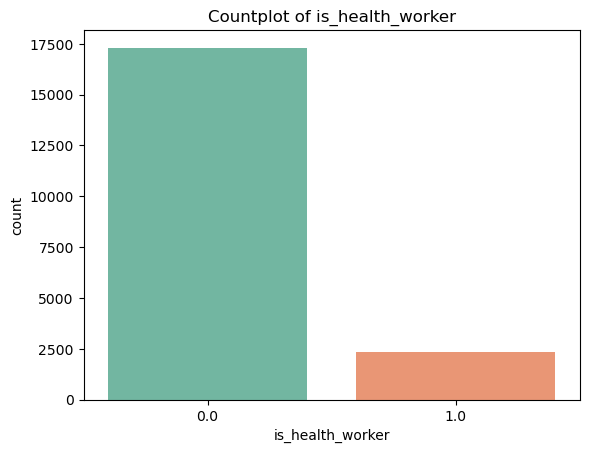

In [56]:
# Bar Plot
sns.countplot(x = 'is_health_worker', data = df_vac , palette = 'Set2')
plt.title('Countplot of is_health_worker')

In [57]:
#Hypothesis Testing
ct_hw = pd.crosstab(df_vac.h1n1_vaccine, df_vac.is_health_worker)
chi2_contingency(ct_hw, correction = False)
# p_val = 4e-152, Ho reject, hence association exists, good predictor 


(690.2288349047097,
 3.985927974118901e-152,
 1,
 array([[13331.92546584,  1796.07453416],
        [ 3978.07453416,   535.92546584]]))

Text(0.5, 1.0, 'Histogram of is_h1n1_vacc_effective')

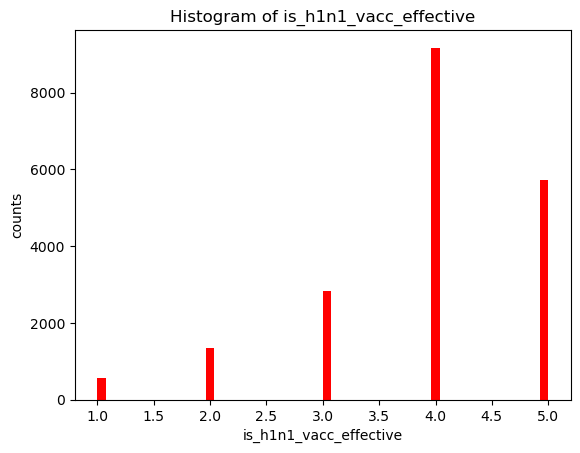

In [58]:
#____________________ 16 is_h1n1_vacc_effective [1,2,3,4,5] ordered
#______histogram
#_run in block
plt.hist(df_vac.is_h1n1_vacc_effective, bins = 'auto', facecolor = 'red')
plt.xlabel('is_h1n1_vacc_effective')
plt.ylabel('counts')
plt.title('Histogram of is_h1n1_vacc_effective') 

<AxesSubplot:>

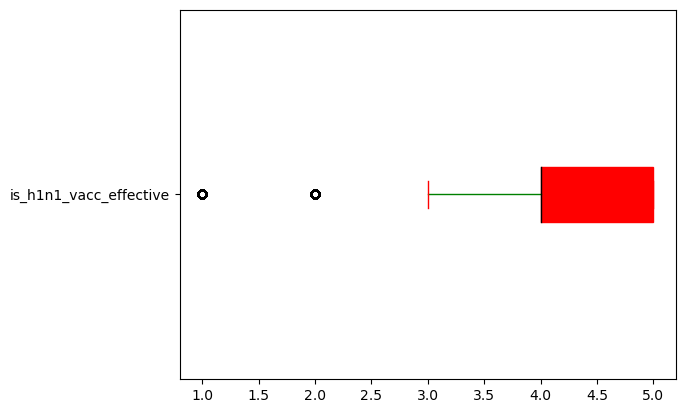

In [59]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df_vac['is_h1n1_vacc_effective'].plot.box(color=props2, patch_artist = True, vert = False)
# few outliers on lower side; IGNORE! 

In [60]:
df_vac.is_h1n1_vacc_effective.isnull().sum() #0 Missing values
df_vac.is_h1n1_vacc_effective.value_counts() 

4.0    9172
5.0    5715
3.0    2838
2.0    1347
1.0     570
Name: is_h1n1_vacc_effective, dtype: int64

Text(0.5, 1.0, 'Countplot of is_h1n1_vacc_effective')

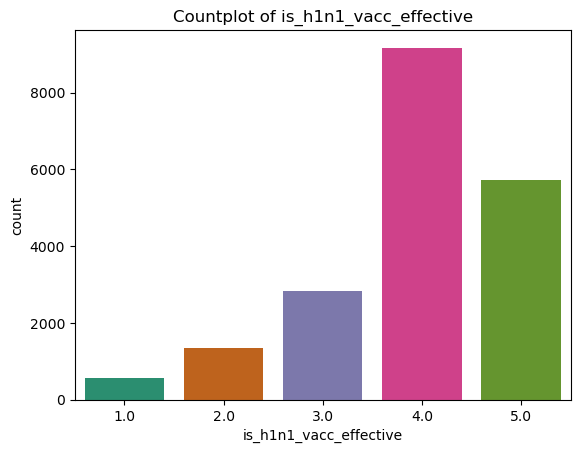

In [61]:
# Bar Plot
sns.countplot(x = 'is_h1n1_vacc_effective', data = df_vac , palette = 'Dark2')
plt.title('Countplot of is_h1n1_vacc_effective')

In [62]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('is_h1n1_vacc_effective~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
#0.0  ie p_value which is <0.05; Ho Reject; Good Predictor

                   df        sum_sq      mean_sq            F  PR(>F)
h1n1_vaccine      1.0   1411.109998  1411.109998  1579.950867     0.0
Residual      19640.0  17541.178618     0.893135          NaN     NaN


Text(0.5, 1.0, 'Histogram of is_h1n1_risky')

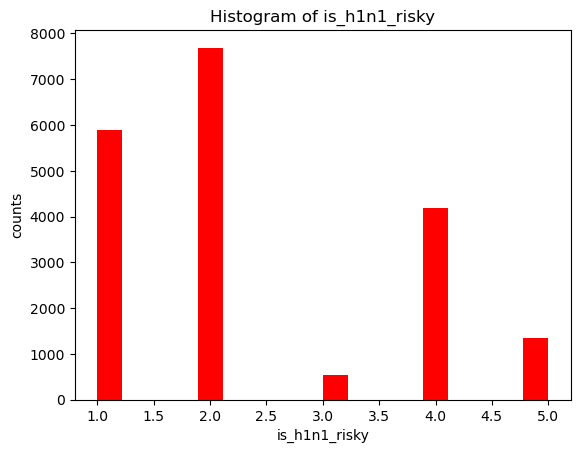

In [63]:
#_______________________ 17 is_h1n1_risky [1,2,3,4,5] ordered
#______histogram
#_run in block
plt.hist(df_vac.is_h1n1_risky, bins = 'auto', facecolor = 'red')
plt.xlabel('is_h1n1_risky')
plt.ylabel('counts')
plt.title('Histogram of is_h1n1_risky')

<AxesSubplot:>

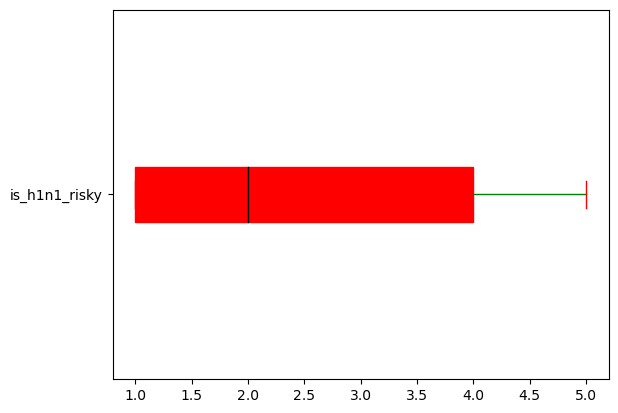

In [64]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df_vac['is_h1n1_risky'].plot.box(color=props2, patch_artist = True, vert = False) #No outliers

In [65]:
df_vac.is_h1n1_risky.isnull().sum() #0 Missing values
df_vac.is_h1n1_risky.value_counts() 

2.0    7691
1.0    5881
4.0    4184
5.0    1348
3.0     538
Name: is_h1n1_risky, dtype: int64

Text(0.5, 1.0, 'Barplot of is_h1n1_risky')

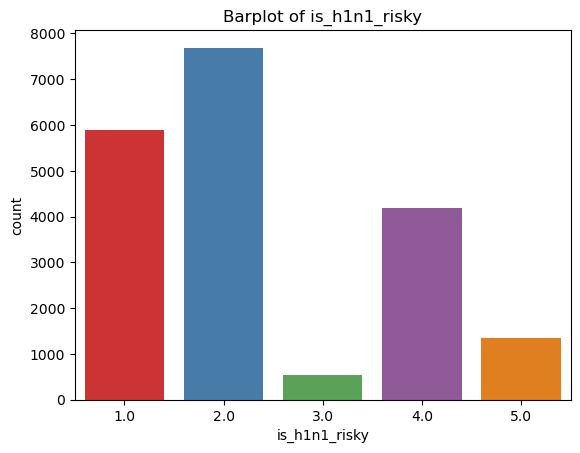

In [66]:
# Bar Plot
sns.countplot(x = 'is_h1n1_risky', data = df_vac , palette = 'Set1')
plt.title('Barplot of is_h1n1_risky')

In [67]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('is_h1n1_risky ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
#0.0  ie p_value is <0.05; Ho Reject; Good Predictor

                   df        sum_sq      mean_sq            F  PR(>F)
h1n1_vaccine      1.0   4134.782428  4134.782428  2838.602067     0.0
Residual      19640.0  28608.140543     1.456626          NaN     NaN


Text(0.5, 1.0, 'Histogram of sick_from_h1n1_vacc')

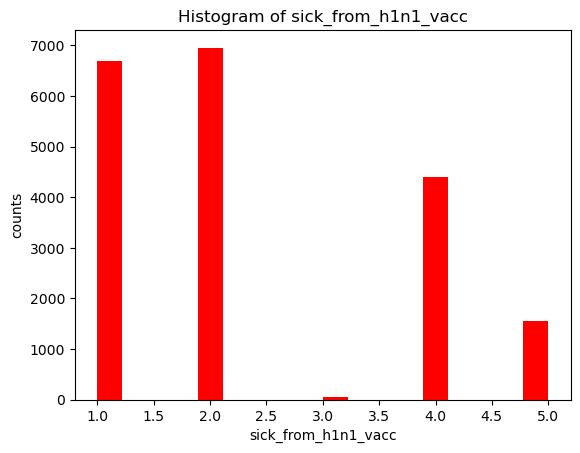

In [68]:
#____________________ 18 sick_from_h1n1_vacc [1,2,3,4,5] ordered 
#______histogram
#_run in block
plt.hist(df_vac.sick_from_h1n1_vacc, bins = 'auto', facecolor = 'red')
plt.xlabel('sick_from_h1n1_vacc')
plt.ylabel('counts')
plt.title('Histogram of sick_from_h1n1_vacc') 

<AxesSubplot:>

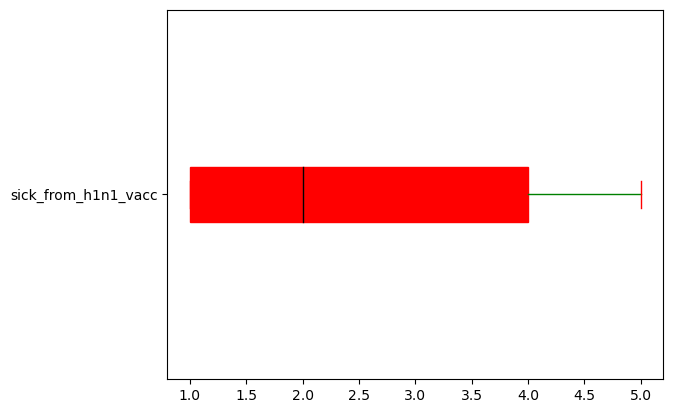

In [69]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df_vac['sick_from_h1n1_vacc'].plot.box(color=props2, patch_artist = True, vert = False) #No outliers

In [70]:
df_vac.sick_from_h1n1_vacc.isnull().sum() #0 Missing values
df_vac.sick_from_h1n1_vacc.value_counts() 


2.0    6956
1.0    6684
4.0    4390
5.0    1560
3.0      52
Name: sick_from_h1n1_vacc, dtype: int64

Text(0.5, 1.0, 'Countplot of sick_from_h1n1_vacc')

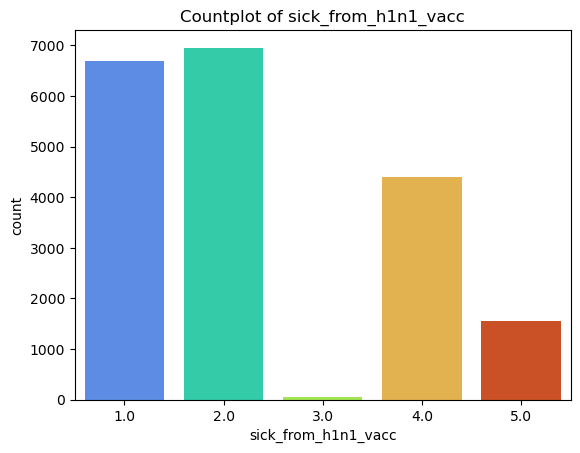

In [71]:
# Bar Plot
sns.countplot(x = 'sick_from_h1n1_vacc', data = df_vac , palette = 'turbo')
plt.title('Countplot of sick_from_h1n1_vacc')

In [72]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('sick_from_h1n1_vacc ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
#3.62e-31  ie p_value is <0.05; Ho Reject; Good Predictor

                   df        sum_sq     mean_sq           F        PR(>F)
h1n1_vaccine      1.0    246.018980  246.018980  135.282692  3.623260e-31
Residual      19640.0  35716.414988    1.818555         NaN           NaN


Text(0.5, 1.0, 'Countplot of is_seas_vacc_effective')

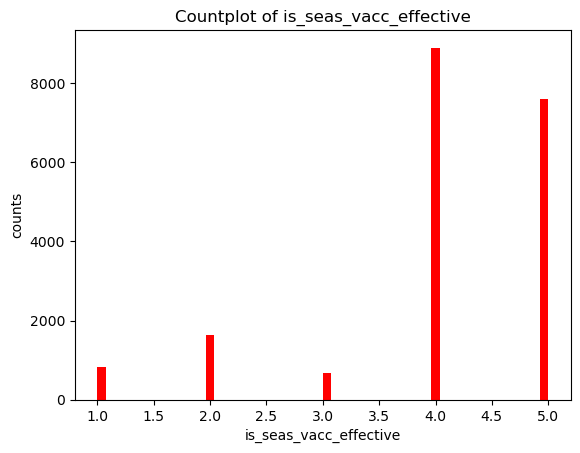

In [73]:
#_______________ 19 is_seas_vacc_effective [1,2,3,4,5] ordered
#______histogram
#_run in block
plt.hist(df_vac.is_seas_vacc_effective, bins = 'auto', facecolor = 'red')
plt.xlabel('is_seas_vacc_effective')
plt.ylabel('counts')
plt.title('Countplot of is_seas_vacc_effective') 

<AxesSubplot:>

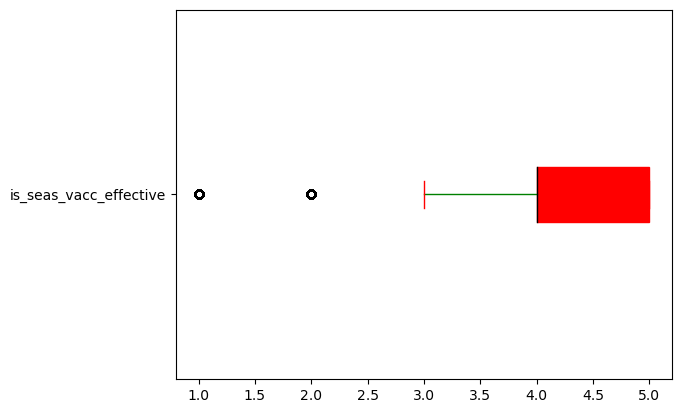

In [74]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df_vac['is_seas_vacc_effective'].plot.box(color=props2, patch_artist = True, vert = False) 
# few are on lower side; Ignore outliers

In [75]:
df_vac.is_seas_vacc_effective.isnull().sum() #0 Missing values
df_vac.is_seas_vacc_effective.value_counts() 

4.0    8906
5.0    7603
2.0    1638
1.0     822
3.0     673
Name: is_seas_vacc_effective, dtype: int64

Text(0.5, 1.0, 'Barplot of is_seas_vacc_effective')

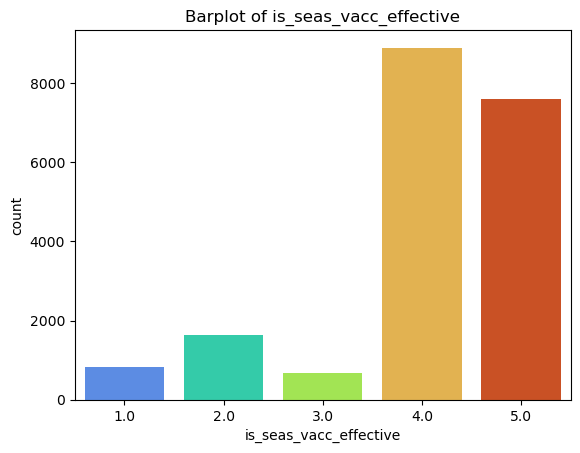

In [76]:
# Bar Plot
sns.countplot(x = 'is_seas_vacc_effective', data = df_vac , palette = 'turbo')
plt.title('Barplot of is_seas_vacc_effective')

In [77]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('is_seas_vacc_effective ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
#9.2e-152 ie p_value is <0.05; Ho Reject; Good Predictor

                   df        sum_sq     mean_sq           F         PR(>F)
h1n1_vaccine      1.0    763.264159  763.264159  700.789605  9.196705e-152
Residual      19640.0  21390.882466    1.089149         NaN            NaN


In [78]:
df_vac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 19642 non-null  float64
 1   h1n1_awareness             19642 non-null  float64
 2   antiviral_medication       19642 non-null  float64
 3   contact_avoidance          19642 non-null  float64
 4   bought_face_mask           19642 non-null  float64
 5   wash_hands_frequently      19642 non-null  float64
 6   avoid_large_gatherings     19642 non-null  float64
 7   reduced_outside_home_cont  19642 non-null  float64
 8   avoid_touch_face           19642 non-null  float64
 9   dr_recc_h1n1_vacc          19642 non-null  float64
 10  dr_recc_seasonal_vacc      19642 non-null  float64
 11  chronic_medic_condition    19642 non-null  float64
 12  cont_child_undr_6_mnths    19642 non-null  float64
 13  is_health_worker           19642 non-null  flo

Text(0.5, 1.0, 'Histogram of is_seas_risky')

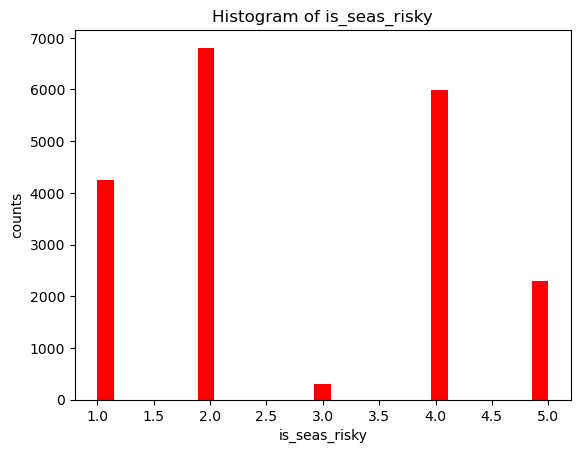

In [79]:
#_____________________ 20 is_seas_risky [1,2,3,4,5] ordered 
#______histogram
#_run in block
plt.hist(df_vac.is_seas_risky, bins = 'auto', facecolor = 'red')
plt.xlabel('is_seas_risky')
plt.ylabel('counts')
plt.title('Histogram of is_seas_risky') 

<AxesSubplot:>

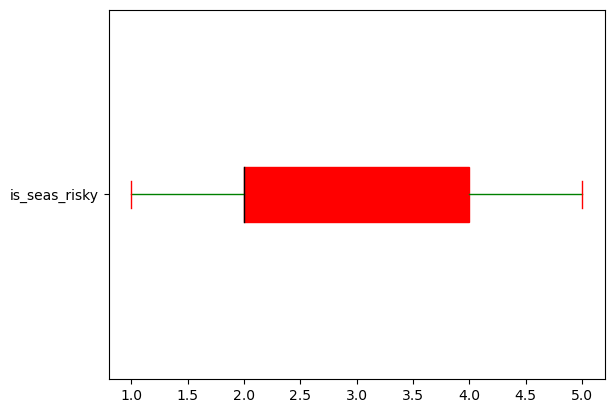

In [80]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df_vac['is_seas_risky'].plot.box(color=props2, patch_artist = True, vert = False)

In [81]:
#_____No_outliers
df_vac.is_seas_risky.isnull().sum() #0 Missing values
df_vac.is_seas_risky.value_counts()

2.0    6811
4.0    5984
1.0    4258
5.0    2286
3.0     303
Name: is_seas_risky, dtype: int64

In [82]:
#______Bar Plot

import seaborn as sns

In [83]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('is_seas_risky ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

                   df        sum_sq      mean_sq            F  PR(>F)
h1n1_vaccine      1.0   2938.840524  2938.840524  1655.101131     0.0
Residual      19640.0  34873.293730     1.775626          NaN     NaN


Text(0.5, 1.0, 'sick_from_seas_vacc')

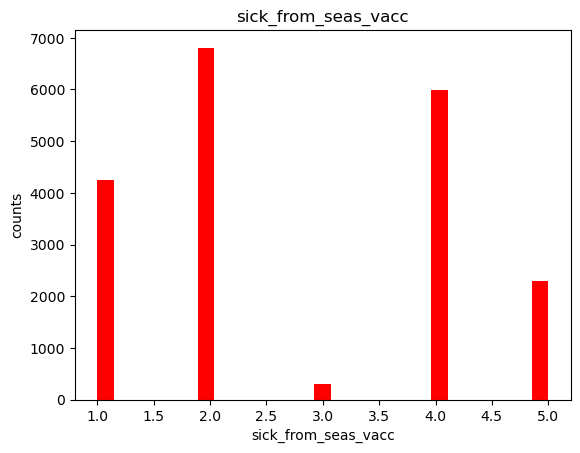

In [84]:
#_________21 sick_from_seas_vacc[1,2,3,4,5] ordered
#_____histogram
#run in block
plt.hist(df_vac.is_seas_risky, bins = 'auto', facecolor = 'red')
plt.xlabel('sick_from_seas_vacc')
plt.ylabel('counts')
plt.title('sick_from_seas_vacc') 

In [85]:
df_vac.sick_from_seas_vacc.isnull().sum()#0 Missing values
df_vac.sick_from_seas_vacc.value_counts()

1.0    8996
2.0    5713
4.0    3683
5.0    1221
3.0      29
Name: sick_from_seas_vacc, dtype: int64

Text(0.5, 1.0, 'Barplot of sick_from seas_vacc')

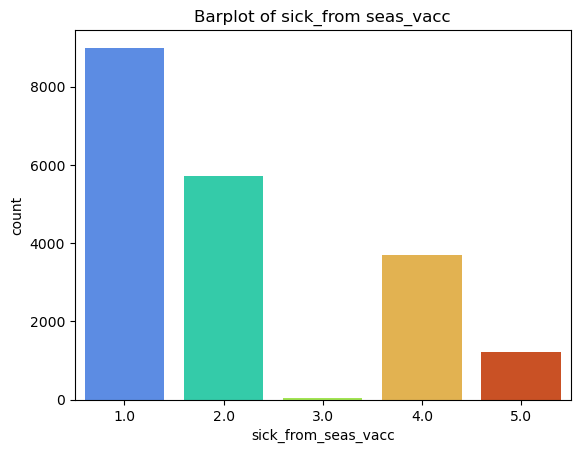

In [86]:
#Bar Plot
sns.countplot( x = 'sick_from_seas_vacc', data = df_vac, palette ='turbo')
plt.title('Barplot of sick_from seas_vacc')

In [87]:
#Is this a good predictor?
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('sick_from_seas_vacc ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

# 0.36 is p_value is >0.05; Ho accepted Bad predictor

                   df        sum_sq   mean_sq         F    PR(>F)
h1n1_vaccine      1.0      1.496253  1.496253  0.851088  0.356256
Residual      19640.0  34528.036789  1.758047       NaN       NaN


In [88]:
#_______ 22 age_bracket [actually ordered]

In [89]:
df_vac.age_bracket.isnull().sum() #0 missing values
df_vac.age_bracket.value_counts()

65+ Years        4491
55 - 64 Years    4234
45 - 54 Years    4038
18 - 34 Years    3925
35 - 44 Years    2954
Name: age_bracket, dtype: int64

In [90]:
#Let categrories be in order
df_vac['age_bracket'] =df_vac.get('age_bracket').replace('65+ Years', 5)
df_vac['age_bracket'] =df_vac.get('age_bracket').replace('55 - 64 Years', 4)
df_vac['age_bracket'] =df_vac.get('age_bracket').replace('45 - 54 Years', 3)
df_vac['age_bracket'] =df_vac.get('age_bracket').replace('18 - 34 Years', 1)
df_vac['age_bracket'] =df_vac.get('age_bracket').replace('35 - 44 Years', 2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10228\3475994703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['age_bracket'] =df_vac.get('age_bracket').replace('65+ Years', 5)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10228\3475994703.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['age_bracket'] =df_vac.get('age_bracket').replace('55 - 64 Years', 4)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10228\3475994703.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [91]:
df_vac.age_bracket.isnull().sum() #0 Missing Values
df_vac.age_bracket.value_counts()

5    4491
4    4234
3    4038
1    3925
2    2954
Name: age_bracket, dtype: int64

<AxesSubplot:>

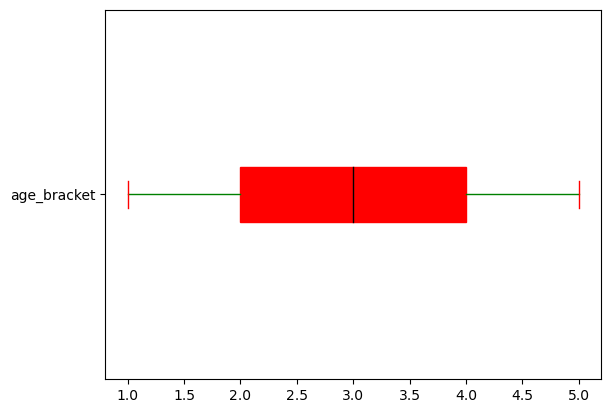

In [92]:
#___boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df_vac['age_bracket'].plot.box(color=props2, patch_artist = True, vert = False)

In [93]:
##Label encoding th data; its good for nominal data, not good for ordered data

Text(0.5, 1.0, 'Barplot of age_bracket')

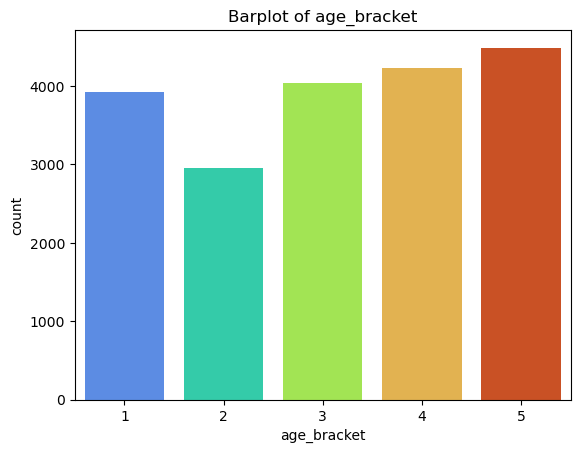

In [94]:
#Bar Plot
sns.countplot( x = 'age_bracket', data = df_vac, palette ='turbo')
plt.title('Barplot of age_bracket')

In [95]:
#Is this a good predictor?
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('age_bracket ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

                   df        sum_sq    mean_sq          F        PR(>F)
h1n1_vaccine      1.0     84.712087  84.712087  41.109469  1.472151e-10
Residual      19640.0  40471.098931   2.060647        NaN           NaN


In [96]:
#_______ 23 qualification - object, Actually ordered! 3 levels

df_vac.qualification.isnull().sum()
df_vac.qualification.value_counts()

College Graduate    8165
Some College        5570
12 Years            4287
< 12 Years          1620
Name: qualification, dtype: int64

In [97]:
#Let put them in theorder
df_vac['qualification'] =df_vac.get('qualification').replace('College Graduate', 4)
df_vac['qualification'] =df_vac.get('qualification').replace('Some College', 3)
df_vac['qualification'] =df_vac.get('qualification').replace('12 Years', 2)
df_vac['qualification'] =df_vac.get('qualification').replace('< 12 Years', 1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10228\1312610385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['qualification'] =df_vac.get('qualification').replace('College Graduate', 4)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10228\1312610385.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['qualification'] =df_vac.get('qualification').replace('Some College', 3)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10228\1312610385.py:4: SettingWithCopyWarning: 
A value is trying to be set on

In [98]:
df_vac.qualification.value_counts()

4    8165
3    5570
2    4287
1    1620
Name: qualification, dtype: int64

Text(0.5, 1.0, 'Barplot of qualification')

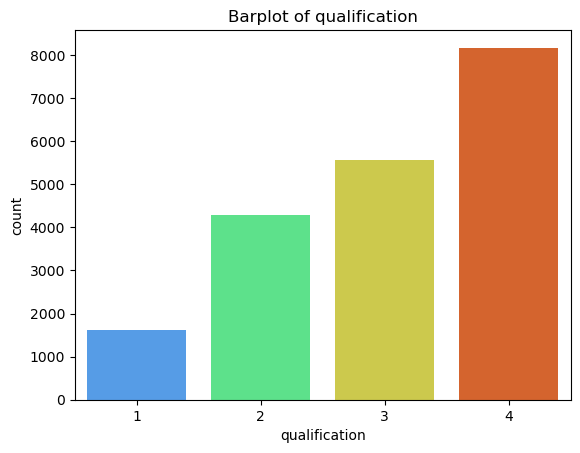

In [99]:
#Bar Plot
sns.countplot( x = 'qualification', data = df_vac, palette ='turbo')
plt.title('Barplot of qualification')

In [100]:
#Is this a good predictor?
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('qualification ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
# 1.572981e-22 is p_value is<0.05; Ho rejected; Good predictor

                   df        sum_sq    mean_sq          F        PR(>F)
h1n1_vaccine      1.0     91.618704  91.618704  95.612329  1.572981e-22
Residual      19640.0  18819.658151   0.958231        NaN           NaN


In [101]:
#_______ 24 race - object [No order, Nominal]; 4 Levels

df_vac.race.isnull().sum()
df_vac.race.value_counts()

White                15745
Black                 1474
Hispanic              1295
Other or Multiple     1128
Name: race, dtype: int64

In [102]:
#Label encoding 'race'; does alphabetically!
#Here we can use Label_Encoder!

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [103]:
df_vac['race'] = le.fit_transform(df_vac['race'])
df_vac.race.value_counts()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10228\1490510576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['race'] = le.fit_transform(df_vac['race'])


3    15745
0     1474
1     1295
2     1128
Name: race, dtype: int64

Text(0.5, 1.0, 'Barplot of race')

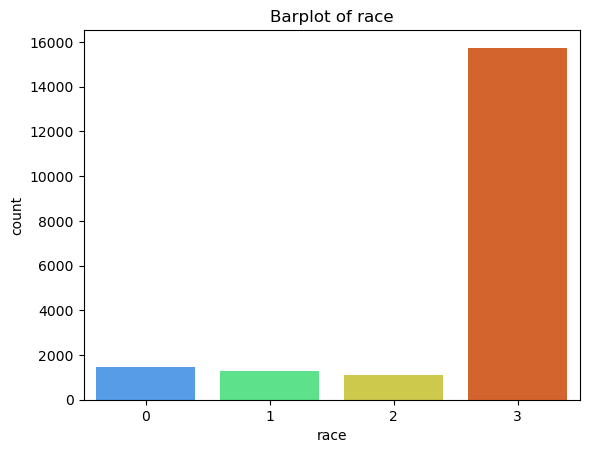

In [104]:
##Bar Plot
sns.countplot( x = 'race', data = df_vac, palette ='turbo')
plt.title('Barplot of race')

In [105]:
#Is this a good predictor?
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_race = pd.crosstab(df_vac.h1n1_vaccine, df_vac.race)
chi2_contingency(ct_race, correction= False)
# p_val = 2.49e-10, Ho reject, hence association exits, good predictor

(47.734514060409225,
 2.425304962460163e-10,
 3,
 array([[ 1135.25465839,   997.39130435,   868.77018634, 12126.58385093],
        [  338.74534161,   297.60869565,   259.22981366,  3618.41614907]]))

In [106]:
#________25 sex - object [fEMALE, MALE]
df_vac.sex.isnull().sum() #No missing values
df_vac.sex.value_counts()

Female    11638
Male       8004
Name: sex, dtype: int64

In [107]:
#Here we can use Label_Encoder!

df_vac['sex'] = le.fit_transform(df_vac['sex'])
df_vac.sex.value_counts()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10228\3675910774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['sex'] = le.fit_transform(df_vac['sex'])


0    11638
1     8004
Name: sex, dtype: int64

Text(0.5, 1.0, 'Barplot of sex')

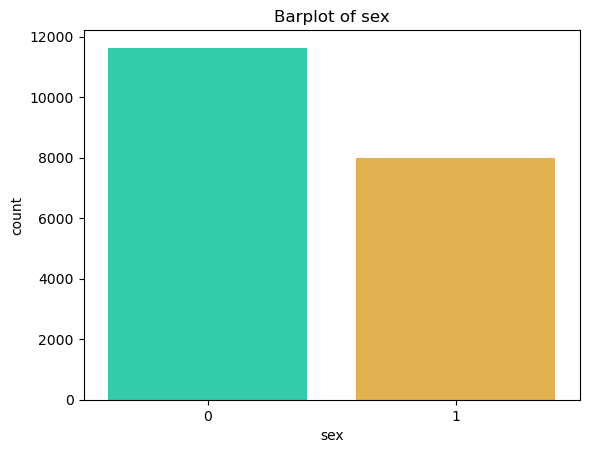

In [108]:
##Bar Plot
sns.countplot( x = 'sex', data = df_vac, palette ='turbo')
plt.title('Barplot of sex')

In [109]:
#Is this a good predictor?
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_sex = pd.crosstab(df_vac.h1n1_vaccine, df_vac.sex)
chi2_contingency(ct_sex, correction= False)
#p_val = 00, Ho reject, hence association exists, good predictor

(12.498872792045749,
 0.0004071976301199202,
 1,
 array([[8963.42857143, 6164.57142857],
        [2674.57142857, 1839.42857143]]))

In [110]:
#________26 income_level - object its ordered
df_vac.income_level.isnull().sum() #No missing values
df_vac.income_level.value_counts()

<= $75,000, Above Poverty    11185
> $75,000                     6159
Below Poverty                 2298
Name: income_level, dtype: int64

In [111]:
#Converting to numeric/ integer
df_vac['income_level'] =df_vac.get('income_level').replace('Below Poverty', 1)
df_vac['income_level'] =df_vac.get('income_level').replace('<= $75,000, Above Poverty', 2)
df_vac['income_level'] =df_vac.get('income_level').replace('> $75,000', 3)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10228\3372494118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['income_level'] =df_vac.get('income_level').replace('Below Poverty', 1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10228\3372494118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['income_level'] =df_vac.get('income_level').replace('<= $75,000, Above Poverty', 2)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10228\3372494118.py:4: SettingWithCopyWarning: 
A value is trying to be 

In [112]:
df_vac.income_level.value_counts()

2    11185
3     6159
1     2298
Name: income_level, dtype: int64

In [113]:
df_vac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 19642 non-null  float64
 1   h1n1_awareness             19642 non-null  float64
 2   antiviral_medication       19642 non-null  float64
 3   contact_avoidance          19642 non-null  float64
 4   bought_face_mask           19642 non-null  float64
 5   wash_hands_frequently      19642 non-null  float64
 6   avoid_large_gatherings     19642 non-null  float64
 7   reduced_outside_home_cont  19642 non-null  float64
 8   avoid_touch_face           19642 non-null  float64
 9   dr_recc_h1n1_vacc          19642 non-null  float64
 10  dr_recc_seasonal_vacc      19642 non-null  float64
 11  chronic_medic_condition    19642 non-null  float64
 12  cont_child_undr_6_mnths    19642 non-null  float64
 13  is_health_worker           19642 non-null  flo

Text(0.5, 1.0, 'Barplot of income_level')

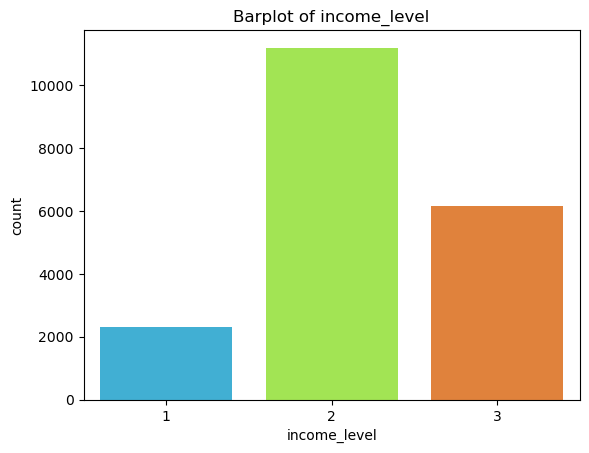

In [114]:
##Bar Plot
sns.countplot( x = 'income_level', data = df_vac, palette ='turbo')
plt.title('Barplot of income_level')

In [115]:
#Is this a good predictor?
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('income_level ~ h1n1_vaccine', data= df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
#p_value is 2.62e-15 <0.05; Ho rejected; Good predictor

                   df       sum_sq    mean_sq          F        PR(>F)
h1n1_vaccine      1.0    24.472822  24.472822  62.636538  2.617146e-15
Residual      19640.0  7673.575900   0.390712        NaN           NaN


In [116]:
#________26 marital_status - object [0,1]
df_vac.marital_status.isnull().sum()#471 Missing values
df_vac.marital_status.value_counts()

Married        10768
Not Married     8874
Name: marital_status, dtype: int64

In [117]:
#Label_encoding the data
df_vac['marital_status'] = le.fit_transform(df_vac['marital_status'])
df_vac.marital_status.value_counts()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10228\893624323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['marital_status'] = le.fit_transform(df_vac['marital_status'])


0    10768
1     8874
Name: marital_status, dtype: int64

In [118]:
df_vac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 19642 non-null  float64
 1   h1n1_awareness             19642 non-null  float64
 2   antiviral_medication       19642 non-null  float64
 3   contact_avoidance          19642 non-null  float64
 4   bought_face_mask           19642 non-null  float64
 5   wash_hands_frequently      19642 non-null  float64
 6   avoid_large_gatherings     19642 non-null  float64
 7   reduced_outside_home_cont  19642 non-null  float64
 8   avoid_touch_face           19642 non-null  float64
 9   dr_recc_h1n1_vacc          19642 non-null  float64
 10  dr_recc_seasonal_vacc      19642 non-null  float64
 11  chronic_medic_condition    19642 non-null  float64
 12  cont_child_undr_6_mnths    19642 non-null  float64
 13  is_health_worker           19642 non-null  flo

Text(0.5, 1.0, 'Barplot of marital_status')

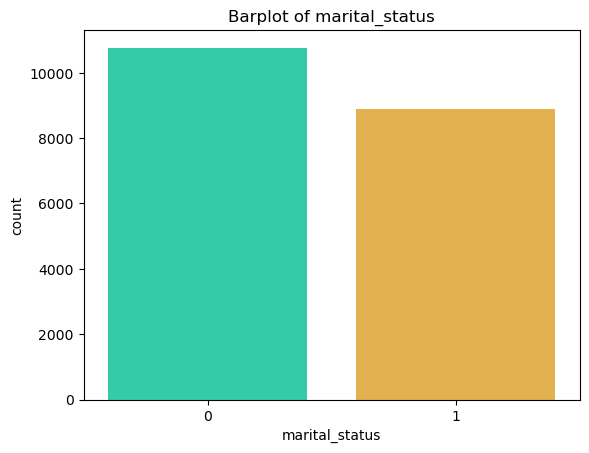

In [119]:
#Bar_plot
sns.countplot( x = 'marital_status', data = df_vac, palette ='turbo')
plt.title('Barplot of marital_status')

In [120]:
#Is this a good predictor?
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_mari = pd.crosstab(df_vac.h1n1_vaccine, df_vac.marital_status)
chi2_contingency(ct_mari, correction= False)

(53.866122687069605,
 2.1462663932476588e-13,
 1,
 array([[8293.36645963, 6834.63354037],
        [2474.63354037, 2039.36645963]]))

In [121]:
#_____28 hosuing_status - object [own, rent]
df_vac.housing_status.isnull().sum()
df_vac.housing_status.value_counts()

Own     14980
Rent     4662
Name: housing_status, dtype: int64

In [122]:
#Label_encoding the data
df_vac['housing_status'] = le.fit_transform(df_vac['housing_status'])
df_vac.housing_status.value_counts()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10228\1426182925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['housing_status'] = le.fit_transform(df_vac['housing_status'])


0    14980
1     4662
Name: housing_status, dtype: int64

Text(0.5, 1.0, 'Barplot of housing_status')

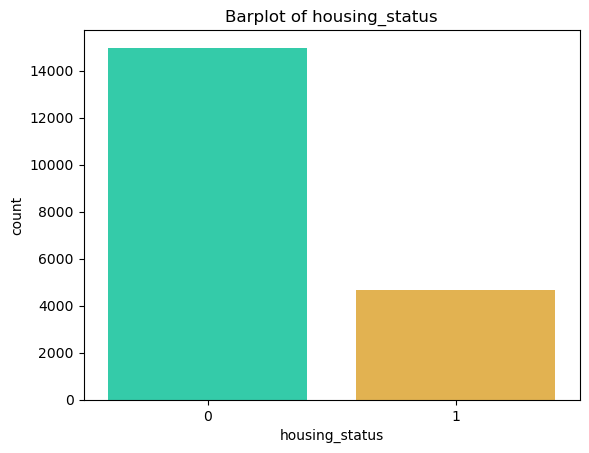

In [123]:
#Bar_plot
sns.countplot( x = 'housing_status', data = df_vac, palette ='turbo')
plt.title('Barplot of housing_status')

In [124]:
#Is this a good predictor?
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_house = pd.crosstab(df_vac.h1n1_vaccine, df_vac.housing_status)
chi2_contingency(ct_house, correction= False)
#p_val = 7.1e-07, Ho reject, hence association exists, good predictor

(24.587253027110627,
 7.101997402926761e-07,
 1,
 array([[11537.39130435,  3590.60869565],
        [ 3442.60869565,  1071.39130435]]))

In [125]:
#_______29 employement - obkect [3 levels ] actually ordered
df_vac.employment.isnull().sum()
df_vac.employment.value_counts()

Employed              11093
Not in Labor Force     7417
Unemployed             1132
Name: employment, dtype: int64

In [126]:
#converting to numeric/ integer
df_vac['employment'] = df_vac.get('employment').replace('Employed', 3)
df_vac['employment'] = df_vac.get('employment').replace('Not in Labor Force', 2)
df_vac['employment'] = df_vac.get('employment').replace('Unemployed', 1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10228\234520357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['employment'] = df_vac.get('employment').replace('Employed', 3)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10228\234520357.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['employment'] = df_vac.get('employment').replace('Not in Labor Force', 2)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10228\234520357.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [127]:
df_vac.employment.value_counts()

3    11093
2     7417
1     1132
Name: employment, dtype: int64

In [128]:
#Label_encoding the data
df_vac['employment'] = le.fit_transform(df_vac['employment'])
df_vac.employment.value_counts()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10228\2616822924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['employment'] = le.fit_transform(df_vac['employment'])


2    11093
1     7417
0     1132
Name: employment, dtype: int64

In [129]:
#Is this a good predictor?
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('employment ~ h1n1_vaccine', data= df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
#p_value is <0.05; Ho rejected ; Good Predictor

                   df       sum_sq   mean_sq         F    PR(>F)
h1n1_vaccine      1.0     2.168418  2.168418  5.938608  0.014822
Residual      19640.0  7171.333720  0.365139       NaN       NaN


In [130]:
#_________30 census_msa - object, 3Levels, Normal
df_vac.census_msa.isnull().sum()#No Missing values
df_vac.census_msa.value_counts()

MSA, Not Principle  City    8571
MSA, Principle City         5717
Non-MSA                     5354
Name: census_msa, dtype: int64

In [131]:
#Label_encoding the data
df_vac['census_msa'] = le.fit_transform(df_vac['census_msa'])
df_vac.census_msa.value_counts()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10228\122203003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['census_msa'] = le.fit_transform(df_vac['census_msa'])


0    8571
1    5717
2    5354
Name: census_msa, dtype: int64

Text(0.5, 1.0, 'Barplot of census_msa')

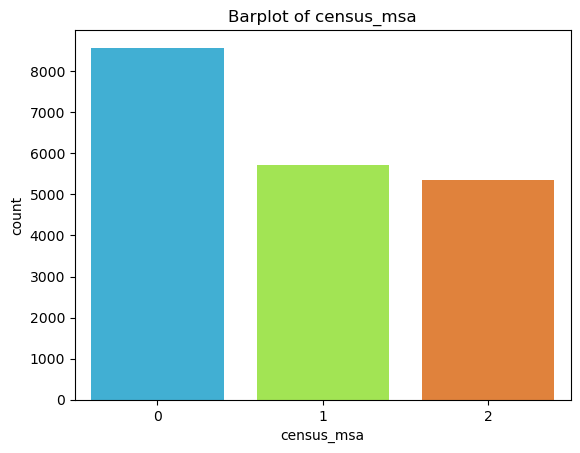

In [132]:
#Bar_plot
sns.countplot( x = 'census_msa', data = df_vac, palette ='turbo')
plt.title('Barplot of census_msa')

In [133]:
#Is this a good predictor?
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_msa = pd.crosstab(df_vac.h1n1_vaccine, df_vac.census_msa)
chi2_contingency(ct_msa, correction= False)

(0.5600038986351584,
 0.7557822681946281,
 2,
 array([[6601.26708075, 4403.1552795 , 4123.57763975],
        [1969.73291925, 1313.8447205 , 1230.42236025]]))

In [134]:
#_______31 no_of_adults, ordered
df_vac.no_of_adults.isnull().sum()#No missing Values
df_vac.no_of_adults.value_counts()

1.0    11006
0.0     5683
2.0     2124
3.0      829
Name: no_of_adults, dtype: int64

Text(0.5, 1.0, 'Countplot of no_of_adults')

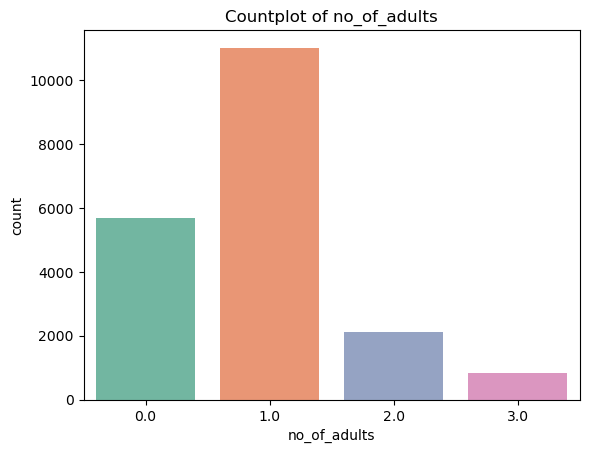

In [135]:
#Bar Plot
sns.countplot(x = 'no_of_adults', data = df_vac , palette = 'Set2')
plt.title('Countplot of no_of_adults')

In [136]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('no_of_adults ~ h1n1_vaccine', data =df_vac).fit()
aov_table =sm.stats.anova_lm(mod)
print(aov_table)
#0.55 ie p_values is >0.05; H0 accepted; Bad Predictor

                   df        sum_sq   mean_sq        F    PR(>F)
h1n1_vaccine      1.0      0.192588  0.192588  0.34578  0.556518
Residual      19640.0  10938.824060  0.556967      NaN       NaN


In [137]:
#________ 32 no__children, ordered
df_vac.no_of_children.isnull().sum() #No Missing values
df_vac.no_of_children.value_counts()

0.0    13697
1.0     2402
2.0     2207
3.0     1336
Name: no_of_children, dtype: int64

Text(0.5, 1.0, 'Countplot of no_of_children')

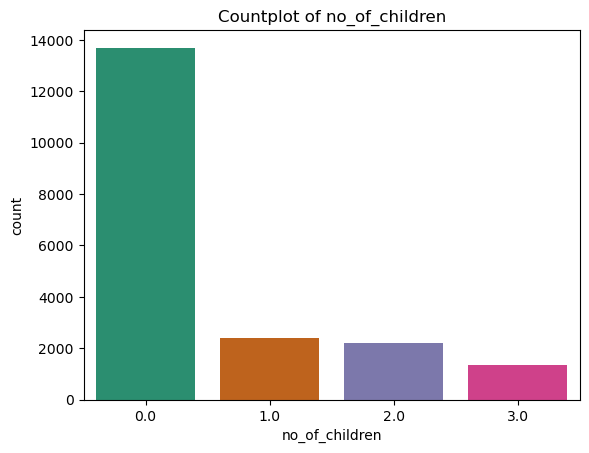

In [138]:
#Bar Plot
sns.countplot(x = 'no_of_children', data = df_vac, palette ='Dark2')
plt.title('Countplot of no_of_children')

In [139]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('no_of_children ~ h1n1_vaccine', data= df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
#0.63 ie p_value is > 0.05: Ho accepted; Bad Predictor

                   df        sum_sq   mean_sq         F    PR(>F)
h1n1_vaccine      1.0      0.202039  0.202039  0.229512  0.631891
Residual      19640.0  17289.080722  0.880299       NaN       NaN


#### We are almost near to out final data!

In [140]:
df_vac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 19642 non-null  float64
 1   h1n1_awareness             19642 non-null  float64
 2   antiviral_medication       19642 non-null  float64
 3   contact_avoidance          19642 non-null  float64
 4   bought_face_mask           19642 non-null  float64
 5   wash_hands_frequently      19642 non-null  float64
 6   avoid_large_gatherings     19642 non-null  float64
 7   reduced_outside_home_cont  19642 non-null  float64
 8   avoid_touch_face           19642 non-null  float64
 9   dr_recc_h1n1_vacc          19642 non-null  float64
 10  dr_recc_seasonal_vacc      19642 non-null  float64
 11  chronic_medic_condition    19642 non-null  float64
 12  cont_child_undr_6_mnths    19642 non-null  float64
 13  is_health_worker           19642 non-null  flo

#lets delete
index 19, sick_from_seas_vacc
index 28, census_msa
index 29, no_of_adults
index 30, no_of_children

And save new data as hn and export to wd and
then start a new script

In [141]:
hn = df_vac.drop(['sick_from_seas_vacc', 'census_msa','no_of_adults','no_of_children'], axis =1)
hn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 19642 non-null  float64
 1   h1n1_awareness             19642 non-null  float64
 2   antiviral_medication       19642 non-null  float64
 3   contact_avoidance          19642 non-null  float64
 4   bought_face_mask           19642 non-null  float64
 5   wash_hands_frequently      19642 non-null  float64
 6   avoid_large_gatherings     19642 non-null  float64
 7   reduced_outside_home_cont  19642 non-null  float64
 8   avoid_touch_face           19642 non-null  float64
 9   dr_recc_h1n1_vacc          19642 non-null  float64
 10  dr_recc_seasonal_vacc      19642 non-null  float64
 11  chronic_medic_condition    19642 non-null  float64
 12  cont_child_undr_6_mnths    19642 non-null  float64
 13  is_health_worker           19642 non-null  flo

In [142]:
hn.to_csv('hn.csv')

In [143]:
#__________lets create dummy variables for 'race'

df2 = pd.get_dummies(hn.race, drop_first =True, prefix='race')
hnd = pd.concat([hn, df2], axis = 1)

In [144]:
# we must remove the original col 'race'
hnc = hnd.drop(['race'], axis =1)
hnc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 19642 non-null  float64
 1   h1n1_awareness             19642 non-null  float64
 2   antiviral_medication       19642 non-null  float64
 3   contact_avoidance          19642 non-null  float64
 4   bought_face_mask           19642 non-null  float64
 5   wash_hands_frequently      19642 non-null  float64
 6   avoid_large_gatherings     19642 non-null  float64
 7   reduced_outside_home_cont  19642 non-null  float64
 8   avoid_touch_face           19642 non-null  float64
 9   dr_recc_h1n1_vacc          19642 non-null  float64
 10  dr_recc_seasonal_vacc      19642 non-null  float64
 11  chronic_medic_condition    19642 non-null  float64
 12  cont_child_undr_6_mnths    19642 non-null  float64
 13  is_health_worker           19642 non-null  flo

In [147]:
hnc.to_csv('hnc.csv')

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

# part 1 is done here.